In [1]:
import morePVs_output as opm
import morePVs as mpv
import os
import en_utilities as um
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Plotting NPV
-----------------------------------


Repeating Costs Barchart but using NPV instead:
relative to 
1) EN
2) btm
For range of:
* PV sizes
* external tariffs and amortization periods

A) Repeat plot, replot for other parameters

B) Plot bau, en, en and pv for range of pvs for each site
   x different tariffs and terms
   x with / without parent FiT
   
   
 


In [2]:


project='EN1_rerun3'
study_name='value11b'
base_path='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_4\\studies'
op = opm.Output(base_path = base_path,
                          project = project,
                          study_name = study_name)

In [3]:
self = op
df = self.data.copy()
df_in = self.study_parameters.copy()


df = df.merge(df_in,left_index = True, right_index=True)
for c in df.columns:
    if '_x' in c:
        nc = c[:-2]
        df.rename(columns={c:nc}, inplace=True)
self.plot_path = os.path.join(self.plot_path, 'barcharts')
if not os.path.exists (self.plot_path):
    os.mkdir(self.plot_path)

In [4]:
# Set up constants
sites = ['A','E',  'D','B', 'H', 'I', 'G', 'C',  'J', 'F' ]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ordered_sites = dict(zip(sites,values))
tag_list = ['a208_f12_cp34',
 'a161_f7_cp38',
 'a138_f9_cp44',
 'a104_f8_cp57',
 'a52_f3_cp26',
 'a48_f4_cp09',
 'a44_f4_cp17',
 'a34_f4_cp33',
 'a26_f4_cp43',
 'a20_f5_cp36']

tag_sorter= dict(zip(tag_list,values))
tag_dict = dict(zip(sites,tag_list))

# Plotting set-up parameters
cmap = mpl.cm.tab10
alpha=1
markers =['x','o','D','*','^','H','s','v','>','<']
site_markers = dict(zip(sites,markers))
colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
site_colours = dict(zip(sites,colours))
# get pv sizes for maximum pv systems
maximums={}
pv_ref_file='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_4\\reference\\capex_pv_lookup.csv'
pv_ref=pd.read_csv(pv_ref_file)
pv_ref = pv_ref.set_index('pv_cap_id')
for i in pv_ref.index:
    if 'max' in i and 'site' in i:
        site = um.find_between(i,'_','_')
        maximums[site] = pv_ref.loc[i,'kW']
en_capexes= ['capex_low','capex_med','capex_high']
# parents = ['EA310_12c_FIT8', 'EA310_12c_FIT12', 'EA310_12c',
#            'EA310_10c_FIT8', 'EA310_10c_FIT12', 'EA310_10c',
#          'EA310_8c_FIT8', 'EA310_8c_FIT12','EA310_8c']
a_terms =[5,10,15,20,25]

In [5]:
df['site'] = df['load_folder'].str[-1]
df['site_tag'] = df['site'].apply(lambda x: tag_dict[x])

In [6]:
# get kWp / unit and npv $ / unit for each scenario
df['pv_filename'].fillna('zero',inplace=True)

for s in df.index:
    site = df.loc[s,'load_folder'][-1]
    a_term = df.loc[s,'a_term']
    df.loc[s,'site']=site
    if df.loc[s,'pv_filename'] == 'zero':
        df.loc[s,'kwp_unit'] =0
    elif 'max' in df.loc[s,'pv_filename']:
        df.loc[s,'kwp_unit']= maximums[site]/df.loc[s,'number_of_households']
    else:
        df.loc[s,'kwp_unit'] = float(df.loc[s,'pv_filename'][-9]) + float(df.loc[s,'pv_filename'][-7])/10
    
    # Calculate NPV relative to bau:
    df.loc[s,'npv_unit'] = df.loc[s,'eno$_npv_building_mean']/df.loc[s,'number_of_households']
    bau_scenario = df[(df['site']==site) & (df['arrangement'] == 'bau')& (df['a_term'] == a_term)].index
    df.loc[s,'bau_npv'] = (df.loc[bau_scenario,'eno$_npv_building_mean']).values[0]/df.loc[s,'number_of_households']
    df.loc[s,'npv_cf_bau'] = df.loc[s,'npv_unit'] - df.loc[s,'bau_npv']
    df.loc[s,'%_npv_bau'] = df.loc[s,'npv_cf_bau']/ df.loc[s,'bau_npv'] *100
        

In [7]:
# Sort sites in correct order (decreasing number apartments)
df['site_order']= df['site'].apply(lambda x: ordered_sites[x])
df.sort_values(by='site_order', inplace=True)

In [8]:

capex= 'capex_med'
#1) Max PV for Site

tariff = 'EASO_TOU_15pc_FIT8'
bau_tariffs = ['EASO_TOU_15pc_FIT8','EASO_TOU_15pc','EASO_TOU_15pc_FIT12']
parent_retail = 'TOU12_FIT8'  
# a_term = 20


NameError: name 'min_y' is not defined

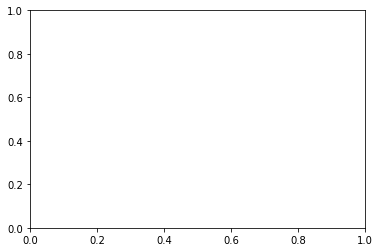

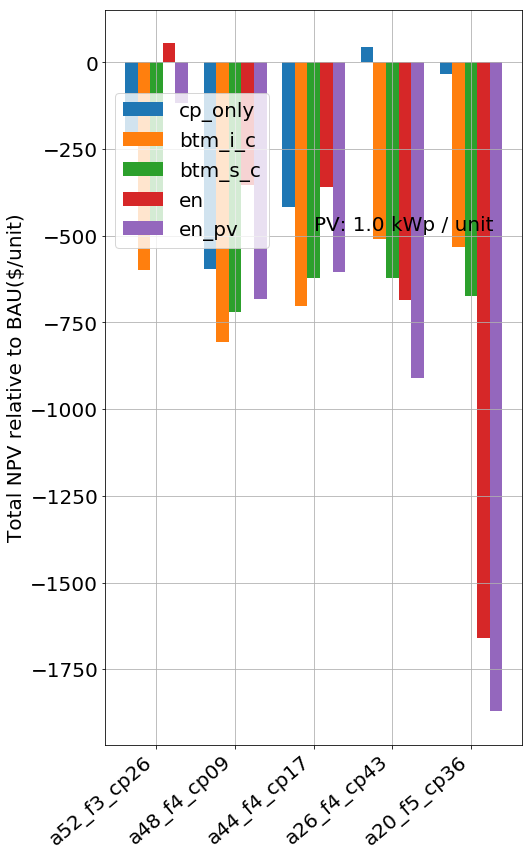

In [9]:
for a_term in a_terms:
    # For Maxbarchart, first use single set of parameters with max PV
    sites = sites
    arrangements = ['cp_only','btm_i_c',  'btm_s_c', 'en', 'en_pv'  ] # 'bau' removed as plotting npv savings vs bau
    arr_values = [i for i in range(1,6)]
    arr_sorter= dict(zip(arrangements, arr_values))
    dfx= df.copy()
    dfbau = dfx.loc[(dfx['arrangement'] == 'bau') & (dfx['all_residents'].str.contains(tariff[0:12]) )]

    dfcp = dfx.loc[(dfx['arrangement'] == 'cp_only') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))]


    dfbtmi = dfx.loc[(dfx['arrangement'] == 'btm_i_u') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))]

    dfbtmicp = dfx.loc[(dfx['arrangement'] == 'btm_i_c') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))]


    if 'FIT' in parent_retail:
        dfen = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex)] 
        dfenp = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max')) &
                      (dfx['en_capex_id'] == capex)]
    else:
        dfen = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex)& ~(dfx['parent'].str.contains('FIT'))]
        dfenp = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max')) &
                      (dfx['en_capex_id'] == capex) & ~(dfx['parent'].str.contains('FIT'))]


    dfbtmsu = dfx.loc[(dfx['arrangement'] == 'btm_s_u') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))& (dfx['en_capex_id'] == 'upfront_1')]

    dfbtmsc = dfx.loc[(dfx['arrangement'] == 'btm_s_c') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))& (dfx['en_capex_id'] == 'upfront_1')]

    dfbtmpu = dfx.loc[(dfx['arrangement'] == 'btm_p_u') & (dfx['all_residents'] == 'SIT_15_ppa1') &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))& 
                  (dfx['en_capex_id'] == 'ppa_1')]

    dfbtmpc = dfx.loc[(dfx['arrangement'] == 'btm_p_c') & (dfx['all_residents'] == 'SIT_15_ppa1') &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))& 
                  (dfx['en_capex_id'] == 'ppa_1')]

    # df4 = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail)) & ~(dfx['parent'].str.contains('FIT')) &
    #               (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max')) & (dfx['en_capex_id'] == capex)]
    # df5 = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail)) & ~(dfx['parent'].str.contains('FIT')) &
    #               (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex)]

    dfallmax = dfbau.append([dfcp,dfbtmicp,dfbtmsc,dfen,dfenp])     

    # For barchart, use single set of parameters with 1kWp/unit
    capex= 'capex_med'

    #2)
    kWp_per_unit = 1.0



    dfx= df.copy()
    dfbau = dfx.loc[(dfx['arrangement'] == 'bau') & (dfx['all_residents'].str.contains(tariff[0:12]) )]

    dfcp = dfx.loc[(dfx['arrangement'] == 'cp_only') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) &
                  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) ]

    dfbtmicp  = dfx.loc[(dfx['arrangement'] == 'btm_i_c') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) &
                  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) ]

    dfbtmsc = dfx.loc[(dfx['arrangement'] == 'btm_s_c') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) & 
                  (dfx['en_capex_id'] == 'upfront_1')]

    if 'FIT' in parent_retail:
        dfen = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex)]

        dfenp = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) &
                      (dfx['en_capex_id'] == capex)]
    else:
        dfen = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex) &
                       ~(dfx['parent'].str.contains('FIT'))]

        dfenp = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) &
                      (dfx['en_capex_id'] == capex)&
                       ~(dfx['parent'].str.contains('FIT'))]



    dfbtmsu = dfx.loc[(dfx['arrangement'] == 'btm_s_u') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) &  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) & 
                  (dfx['en_capex_id'] == 'upfront_1')]

    dfbtmsc = dfx.loc[(dfx['arrangement'] == 'btm_s_c') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) &  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) & 
                   (dfx['en_capex_id'] == 'upfront_1')]

    dfbtmpu = dfx.loc[(dfx['arrangement'] == 'btm_p_u') & (dfx['all_residents'] == 'SIT_15_ppa1') &
                  (dfx['a_term'] == a_term) &  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) &
                  (dfx['en_capex_id'] == 'ppa_1')]

    dfbtmpc = dfx.loc[(dfx['arrangement'] == 'btm_p_c') & (dfx['all_residents'] == 'SIT_15_ppa1') &
                  (dfx['a_term'] == a_term) &  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) & 
                  (dfx['en_capex_id'] == 'ppa_1')]


    dfall1 = dfbau.append([dfcp,dfbtmicp,dfbtmsc,dfen,dfenp])   

    # ------------------------
    # Plot NPV relative to BAU
    # ------------------------
    
    
    
#     # Plot Max PV for all Sites
#     # -------------------------
#     dfx= dfallmax.copy()
#     dfx = dfx.loc[dfx['arrangement'] != 'bau']
#     dfx['tag_order'] = dfx['site_tag'].map(tag_sorter)
#     dfx['arr_order']= dfx['arrangement'].map(arr_sorter)

#     # ----------------------
#     # reindex and stack data
#     # ----------------------
#     dfx.index = [dfx.site_tag,dfx.arrangement]
#     dfu = dfx['npv_cf_bau'].unstack()
#     # --------------------
#     # Sort into tag order
#     # --------------------
#     dfu['tag']=dfu.index
#     dfu['order'] = dfu.tag.apply(lambda x: tag_sorter[x])
#     dfu.sort_values('order', ascending = True, inplace=True)
#     dfu.drop(['order','tag'],axis=1,inplace=True)
#     # -----------------------------
#     # Sort into arrangement order
#     # ----------------------------
#     dfu = dfu[arrangements]

#     min_y = dfu.min().min() * 1.05
#     max_y = dfu.max().max() * 1.05
#     # Plotting set-up parameters
#     cmap = mpl.cm.tab10_r
#     alpha=1

#     fig, ax = plt.subplots()
#     ax = dfu.plot(kind='bar',width = 0.8,figsize=(15,12), fontsize=20, legend=False)

#     ax.set_ylabel("Total NPV relative to BAU ($/unit)", fontsize=20)
#     ax.set_xlabel("")
#     #ax.set_title ("Maximum PV ",fontsize=24)
#     #ax.legend(fontsize=20, loc='upper left', bbox_to_anchor=(1, 0.8))
#     #Legends outside box and resize chart to fit
#     # box = ax.get_position()
#     # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     text0='BAU / BTM retail tariff: ' + tariff 
#     text1='EN Parent retail tariff: ' + parent_retail
#     text2 = 'EN Capex: '+ capex
#     text3 = 'Amortisation: '+str(a_term) + ' years'
#     text4 = 'PV: Maximum Roof Capacity'
#     # axes coordinates are 0,0 is bottom left and 1,1 is upper right
#     ax.text(0.5,0.9, text0, fontsize=20,transform=ax.transAxes)
#     ax.text(0.5,0.85,text1, fontsize=20,transform=ax.transAxes)
#     ax.text(0.5,0.8,text2, fontsize=20,transform=ax.transAxes)
#     ax.text(0.5,0.75,text3, fontsize=20,transform=ax.transAxes)
#     ax.text(0.5,0.7,text4, fontsize=20,transform=ax.transAxes)

#     ax.grid(True)
#     ax.set_ylim((min_y, max_y))
#     ax.set_xticklabels(dfu.index,rotation=40, ha='right', fontsize =20)
#     plt.tight_layout() # To ensure labels fit in bounding box
#     #fig.show()
#     pname = 'bar_bau_' + study_name +'bau_btmen_maxpv2_' +parent_retail+ '_'+str(a_term)+'.jpg'
#     plotFile = os.path.join(self.plot_path,pname)
#     plt.savefig(plotFile,dpi=1000)
#     plt.close()

    
    
    # Plot 1kW / unit for subset of sites
    # -----------------------------------
    # Drop sites with no PV = 1kW/unit options:
    dfx= dfall1.copy()
    dfx = dfx.loc[dfx['arrangement'] != 'bau']
    dfx['tag_order'] = dfx['site_tag'].map(tag_sorter)
    dfx['arr_order']= dfx['arrangement'].map(arr_sorter)
    dfx.sort_values(['tag_order','arr_order'], ascending = [True,True] ,inplace=True)
    tags = df['site_tag'].drop_duplicates().tolist()
    for tag in tags:
        if len(dfx.loc[(dfx['site_tag'] ==tag) & (dfx['arrangement']=='btm_s_c')])==0:
            dfx = dfx[dfx.site_tag != tag]


    dfx['tag_order'] = dfx['site_tag'].map(tag_sorter)
    dfx['arr_order']= dfx['arrangement'].map(arr_sorter)
    # dfx.sort_values(['tag_order','arr_order'], ascending = [True,True] ,inplace=True)

    # ----------------------
    # reindex and stack data
    # ----------------------
    dfx.index = [dfx.site_tag,dfx.arrangement]
    dfu = dfx['npv_cf_bau'].unstack()
    # --------------------
    # Sort into tag order
    # --------------------
    dfu['tag']=dfu.index
    dfu['order'] = dfu.tag.apply(lambda x: tag_sorter[x])
    dfu.sort_values('order', ascending = True, inplace=True)
    dfu.drop(['order','tag'],axis=1,inplace=True)
    # -----------------------------
    # Sort into arrangement order
    # ----------------------------
    dfu = dfu[arrangements]

    fig, ax = plt.subplots()
    ax = dfu.plot(kind='bar',width = 0.8,figsize=(7.5,12), fontsize=20)
    ax.set_xlabel("")
    ax.set_ylabel("Total NPV relative to BAU($/unit)", fontsize=20)
    #ax.set_title ("PV 1kWp per Unit",fontsize=24)

    # ----------------
    # Add legend
    # -----------------
    ax.legend(fontsize=20,loc='upper left', bbox_to_anchor=(0,0.9))
    ax.set_xticklabels(dfu.index,rotation=40, ha='right', fontsize =20)

    text4 = 'PV: 1.0 kWp / unit'
    ax.text(0.5,0.7,text4, fontsize=20,transform=ax.transAxes)

    plt.tight_layout() # To ensure labels fit in bounding box
    ax.grid(True)
    ax.set_ylim((min_y, max_y))
    #fig.show()
    pname = 'bar_bau_' + study_name +'_1kW_' +parent_retail+ '_'+str(a_term)+'.jpg'
    plotFile = os.path.join(self.plot_path,pname)
    plt.savefig(plotFile,dpi=1000)
    plt.close()

    # Plot Max PV for all Sites
    # -------------------------

    dfx= dfallmax.copy()
    dfx = dfx.loc[dfx['arrangement'] != 'bau']
    dfx['tag_order'] = dfx['site_tag'].map(tag_sorter)
    dfx['arr_order']= dfx['arrangement'].map(arr_sorter)

    # ----------------------
    # reindex and stack data
    # ----------------------
    dfx.index = [dfx.site_tag,dfx.arrangement]
    dfu = dfx['npv_cf_bau'].unstack()
    # --------------------
    # Sort into tag order
    # --------------------
    dfu['tag']=dfu.index
    dfu['order'] = dfu.tag.apply(lambda x: tag_sorter[x])
    dfu.sort_values('order', ascending = True, inplace=True)
    dfu.drop(['order','tag'],axis=1,inplace=True)
    # -----------------------------
    # Sort into arrangement order
    # ----------------------------
    dfu = dfu[arrangements]


    # Plotting set-up parameters
    cmap = mpl.cm.tab10_r
    alpha=1

    fig, ax = plt.subplots()
    ax = dfu.plot(kind='bar',width = 0.8,figsize=(15,12), fontsize=20, legend=False)

    ax.set_ylabel("Total NPV relative to BAU ($/unit)", fontsize=20)
    ax.set_xlabel("")
    
    text0='BAU / BTM retail tariff: ' + tariff 
    text1='EN Parent retail tariff: ' + parent_retail
    text2 = 'EN Capex: '+ capex
    text3 = 'Amortisation: '+str(a_term) + ' years'
    text4 = 'PV: Maximum Roof Capacity'
    # axes coordinates are 0,0 is bottom left and 1,1 is upper right
    ax.text(0.5,0.9, text0, fontsize=20,transform=ax.transAxes)
    ax.text(0.5,0.85,text1, fontsize=20,transform=ax.transAxes)
    ax.text(0.5,0.8,text2, fontsize=20,transform=ax.transAxes)
    ax.text(0.5,0.75,text3, fontsize=20,transform=ax.transAxes)
    ax.text(0.5,0.7,text4, fontsize=20,transform=ax.transAxes)

    ax.grid(True)
    ax.set_ylim((min_y, max_y))
    ax.set_xticklabels(dfu.index,rotation=40, ha='right', fontsize =20)
    plt.tight_layout() # To ensure labels fit in bounding box
    #fig.show()
    pname = 'bar_bau_' + study_name +'_maxpv_' +parent_retail+ '_'+str(a_term)+'.jpg'
    plotFile = os.path.join(self.plot_path,pname)
    plt.savefig(plotFile,dpi=1000)
    plt.close()


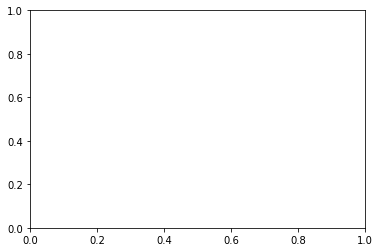

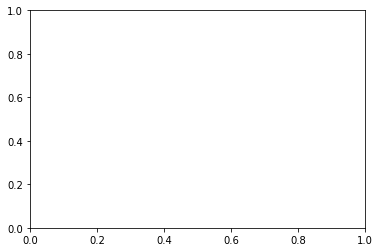

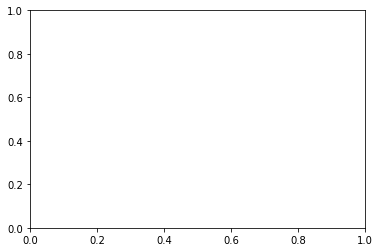

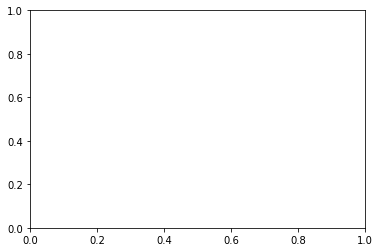

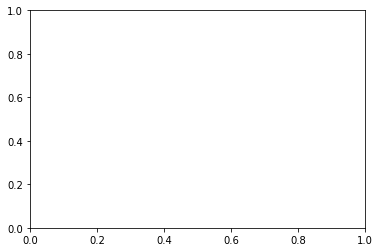

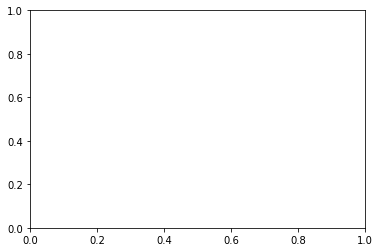

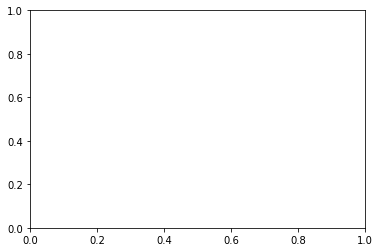

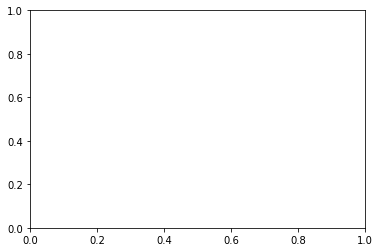

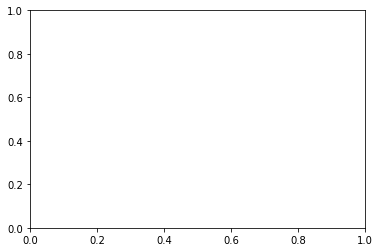

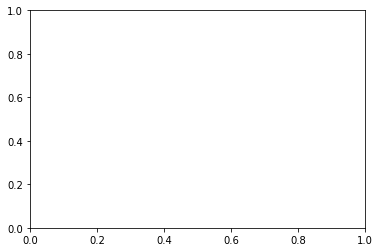

In [14]:
# REPEAT ABOVE BUT FOR NPV of ANNUAL savings
df['npv_cf_bau_pa'] = df['npv_cf_bau'].divide(df['a_term'])
for a_term in a_terms:
    # For Maxbarchart, first use single set of parameters with max PV
    sites = sites
    arrangements = ['cp_only','btm_i_c',  'btm_s_c', 'en', 'en_pv'  ] # 'bau' removed as plotting npv savings vs bau
    arr_values = [i for i in range(1,6)]
    arr_sorter= dict(zip(arrangements, arr_values))
    dfx= df.copy()
    dfbau = dfx.loc[(dfx['arrangement'] == 'bau') & (dfx['all_residents'].str.contains(tariff[0:12]) )]

    dfcp = dfx.loc[(dfx['arrangement'] == 'cp_only') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))]


    dfbtmi = dfx.loc[(dfx['arrangement'] == 'btm_i_u') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))]

    dfbtmicp = dfx.loc[(dfx['arrangement'] == 'btm_i_c') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))]


    if 'FIT' in parent_retail:
        dfen = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex)] 
        dfenp = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max')) &
                      (dfx['en_capex_id'] == capex)]
    else:
        dfen = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex)& ~(dfx['parent'].str.contains('FIT'))]
        dfenp = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max')) &
                      (dfx['en_capex_id'] == capex) & ~(dfx['parent'].str.contains('FIT'))]


    dfbtmsu = dfx.loc[(dfx['arrangement'] == 'btm_s_u') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))& (dfx['en_capex_id'] == 'upfront_1')]

    dfbtmsc = dfx.loc[(dfx['arrangement'] == 'btm_s_c') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))& (dfx['en_capex_id'] == 'upfront_1')]

    dfbtmpu = dfx.loc[(dfx['arrangement'] == 'btm_p_u') & (dfx['all_residents'] == 'SIT_15_ppa1') &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))& 
                  (dfx['en_capex_id'] == 'ppa_1')]

    dfbtmpc = dfx.loc[(dfx['arrangement'] == 'btm_p_c') & (dfx['all_residents'] == 'SIT_15_ppa1') &
                  (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max'))& 
                  (dfx['en_capex_id'] == 'ppa_1')]

    # df4 = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail)) & ~(dfx['parent'].str.contains('FIT')) &
    #               (dfx['a_term'] == a_term) & (dfx['pv_filename'].str.contains('max')) & (dfx['en_capex_id'] == capex)]
    # df5 = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail)) & ~(dfx['parent'].str.contains('FIT')) &
    #               (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex)]

    dfallmax = dfbau.append([dfcp,dfbtmicp,dfbtmsc,dfen,dfenp])     

    # For barchart, use single set of parameters with 1kWp/unit
    capex= 'capex_med'

    #2)
    kWp_per_unit = 1.0



    dfx= df.copy()
    dfbau = dfx.loc[(dfx['arrangement'] == 'bau') & (dfx['all_residents'].str.contains(tariff[0:12]) )]

    dfcp = dfx.loc[(dfx['arrangement'] == 'cp_only') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) &
                  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) ]

    dfbtmicp  = dfx.loc[(dfx['arrangement'] == 'btm_i_c') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) &
                  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) ]

    dfbtmsc = dfx.loc[(dfx['arrangement'] == 'btm_s_c') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) & (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) & 
                  (dfx['en_capex_id'] == 'upfront_1')]

    if 'FIT' in parent_retail:
        dfen = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex)]

        dfenp = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) &
                      (dfx['en_capex_id'] == capex)]
    else:
        dfen = dfx.loc[(dfx['arrangement'] == 'en') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['en_capex_id'] == capex) &
                       ~(dfx['parent'].str.contains('FIT'))]

        dfenp = dfx.loc[(dfx['arrangement'] == 'en_pv') & (dfx['parent'].str.contains(parent_retail))  &
                      (dfx['a_term'] == a_term) & (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) &
                      (dfx['en_capex_id'] == capex)&
                       ~(dfx['parent'].str.contains('FIT'))]



    dfbtmsu = dfx.loc[(dfx['arrangement'] == 'btm_s_u') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) &  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) & 
                  (dfx['en_capex_id'] == 'upfront_1')]

    dfbtmsc = dfx.loc[(dfx['arrangement'] == 'btm_s_c') & (dfx['all_residents'] == tariff) &
                  (dfx['a_term'] == a_term) &  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) & 
                   (dfx['en_capex_id'] == 'upfront_1')]

    dfbtmpu = dfx.loc[(dfx['arrangement'] == 'btm_p_u') & (dfx['all_residents'] == 'SIT_15_ppa1') &
                  (dfx['a_term'] == a_term) &  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) &
                  (dfx['en_capex_id'] == 'ppa_1')]

    dfbtmpc = dfx.loc[(dfx['arrangement'] == 'btm_p_c') & (dfx['all_residents'] == 'SIT_15_ppa1') &
                  (dfx['a_term'] == a_term) &  (dfx['kwp_unit'] > 0.95) & (dfx['kwp_unit'] < 1.05) & 
                  (dfx['en_capex_id'] == 'ppa_1')]


    dfall1 = dfbau.append([dfcp,dfbtmicp,dfbtmsc,dfen,dfenp])   

    # ------------------------
    # Plot NPV relative to BAU
    # ------------------------
    
    
    
#     # Plot Max PV for all Sites
#     # -------------------------
#     dfx= dfallmax.copy()
#     dfx = dfx.loc[dfx['arrangement'] != 'bau']
#     dfx['tag_order'] = dfx['site_tag'].map(tag_sorter)
#     dfx['arr_order']= dfx['arrangement'].map(arr_sorter)

#     # ----------------------
#     # reindex and stack data
#     # ----------------------
#     dfx.index = [dfx.site_tag,dfx.arrangement]
#     dfu = dfx['npv_cf_bau_pa'].unstack()
#     # --------------------
#     # Sort into tag order
#     # --------------------
#     dfu['tag']=dfu.index
#     dfu['order'] = dfu.tag.apply(lambda x: tag_sorter[x])
#     dfu.sort_values('order', ascending = True, inplace=True)
#     dfu.drop(['order','tag'],axis=1,inplace=True)
#     # -----------------------------
#     # Sort into arrangement order
#     # ----------------------------
#     dfu = dfu[arrangements]

#     min_y = dfu.min().min() * 1.05
#     max_y = dfu.max().max() * 1.05
#     # Plotting set-up parameters
#     cmap = mpl.cm.tab10_r
#     alpha=1

#     fig, ax = plt.subplots()
#     ax = dfu.plot(kind='bar',width = 0.8,figsize=(15,12), fontsize=20, legend=False)

#     ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=20)
#     ax.set_xlabel("")
#     #ax.set_title ("Maximum PV ",fontsize=24)
#     #ax.legend(fontsize=20, loc='upper left', bbox_to_anchor=(1, 0.8))
#     #Legends outside box and resize chart to fit
#     # box = ax.get_position()
#     # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     text0='BAU / BTM retail tariff: ' + tariff 
#     text1='EN Parent retail tariff: ' + parent_retail
#     text2 = 'EN Capex: '+ capex
#     text3 = 'Amortisation: '+str(a_term) + ' years'
#     text4 = 'PV: Maximum Roof Capacity'
#     # axes coordinates are 0,0 is bottom left and 1,1 is upper right
#     ax.text(0.5,0.9, text0, fontsize=20,transform=ax.transAxes)
#     ax.text(0.5,0.85,text1, fontsize=20,transform=ax.transAxes)
#     ax.text(0.5,0.8,text2, fontsize=20,transform=ax.transAxes)
#     ax.text(0.5,0.75,text3, fontsize=20,transform=ax.transAxes)
#     ax.text(0.5,0.7,text4, fontsize=20,transform=ax.transAxes)

#     ax.grid(True)
#     ax.set_ylim((min_y, max_y))
#     ax.set_xticklabels(dfu.index,rotation=40, ha='right', fontsize =20)
#     plt.tight_layout() # To ensure labels fit in bounding box
#     #fig.show()
#     pname = 'bar_bau_' + study_name +'_maxpv_' +parent_retail+ '_'+str(a_term)+'.jpg'
#     plotFile = os.path.join(self.plot_path,pname)
#     plt.savefig(plotFile,dpi=1000)
#     plt.close()

    min_y, max_y  = -150, 350
    
    # Plot 1kW / unit for subset of sites
    # -----------------------------------
    # Drop sites with no PV = 1kW/unit options:
    dfx= dfall1.copy()
    dfx = dfx.loc[dfx['arrangement'] != 'bau']
    dfx['tag_order'] = dfx['site_tag'].map(tag_sorter)
    dfx['arr_order']= dfx['arrangement'].map(arr_sorter)
    dfx.sort_values(['tag_order','arr_order'], ascending = [True,True] ,inplace=True)
    tags = df['site_tag'].drop_duplicates().tolist()
    for tag in tags:
        if len(dfx.loc[(dfx['site_tag'] ==tag) & (dfx['arrangement']=='btm_s_c')])==0:
            dfx = dfx[dfx.site_tag != tag]


    dfx['tag_order'] = dfx['site_tag'].map(tag_sorter)
    dfx['arr_order']= dfx['arrangement'].map(arr_sorter)
    # dfx.sort_values(['tag_order','arr_order'], ascending = [True,True] ,inplace=True)

    # ----------------------
    # reindex and stack data
    # ----------------------
    dfx.index = [dfx.site_tag,dfx.arrangement]
    dfu = dfx['npv_cf_bau_pa'].unstack()
    # --------------------
    # Sort into tag order
    # --------------------
    dfu['tag']=dfu.index
    dfu['order'] = dfu.tag.apply(lambda x: tag_sorter[x])
    dfu.sort_values('order', ascending = True, inplace=True)
    dfu.drop(['order','tag'],axis=1,inplace=True)
    # -----------------------------
    # Sort into arrangement order
    # ----------------------------
    dfu = dfu[arrangements]

    fig, ax = plt.subplots()
    ax = dfu.plot(kind='bar',width = 0.8,figsize=(7.5,12), fontsize=20, edgecolor='black',)
    ax.set_xlabel("")
    ax.set_ylabel("NPV of annual savings($/unit)", fontsize=20)
    #ax.set_title ("PV 1kWp per Unit",fontsize=24)

    # ----------------
    # Add legend
    # -----------------
    ax.legend(fontsize=20,loc='upper left', bbox_to_anchor=(0,0.95))
    ax.set_xticklabels(dfu.index,rotation=40, ha='right', fontsize =20)

    text4 = 'PV: 1.0 kWp / unit'
    ax.text(0.5,0.75,text4, fontsize=20,transform=ax.transAxes)

    plt.tight_layout() # To ensure labels fit in bounding box
    ax.grid(True)
    (min_y, max_y) = (-120, 360) 
    ax.set_ylim((min_y, max_y))
    #fig.show()
    pname = 'bar_npv_baupa_' + study_name +'_1kW_' +parent_retail+ '_'+str(a_term)+'.jpg'
    plotFile = os.path.join(self.plot_path,pname)
    plt.savefig(plotFile,dpi=1000)
    plt.close()

    # Plot Max PV for all Sites
    # -------------------------

    dfx= dfallmax.copy()
    dfx = dfx.loc[dfx['arrangement'] != 'bau']
    dfx['tag_order'] = dfx['site_tag'].map(tag_sorter)
    dfx['arr_order']= dfx['arrangement'].map(arr_sorter)

    # ----------------------
    # reindex and stack data
    # ----------------------
    dfx.index = [dfx.site_tag,dfx.arrangement]
    dfu = dfx['npv_cf_bau_pa'].unstack()
    # --------------------
    # Sort into tag order
    # --------------------
    dfu['tag']=dfu.index
    dfu['order'] = dfu.tag.apply(lambda x: tag_sorter[x])
    dfu.sort_values('order', ascending = True, inplace=True)
    dfu.drop(['order','tag'],axis=1,inplace=True)
    # -----------------------------
    # Sort into arrangement order
    # ----------------------------
    dfu = dfu[arrangements]


    # Plotting set-up parameters
    cmap = mpl.cm.tab10_r
    alpha=1

    fig, ax = plt.subplots()
    ax = dfu.plot(kind='bar',width = 0.8,figsize=(15,12), fontsize=20, edgecolor='black',legend=False)

    ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=20)
    ax.set_xlabel("")
    
    text0='BAU / BTM retail tariff: ' + tariff 
    text1='EN Parent retail tariff: ' + parent_retail
    text2 = 'EN Capex: '+ capex
    text3 = 'Amortisation: '+str(a_term) + ' years'
    text4 = 'PV: Maximum Roof Capacity'
    # axes coordinates are 0,0 is bottom left and 1,1 is upper right
    ax.text(0.5,0.95, text0, fontsize=20,transform=ax.transAxes)
    ax.text(0.5,0.9,text1, fontsize=20,transform=ax.transAxes)
    ax.text(0.5,0.85,text2, fontsize=20,transform=ax.transAxes)
    ax.text(0.5,0.8,text3, fontsize=20,transform=ax.transAxes)
    ax.text(0.5,0.75,text4, fontsize=20,transform=ax.transAxes)

    ax.grid(True)
    (min_y, max_y) = (-120, 360) 
    ax.set_ylim((min_y, max_y))
    ax.set_xticklabels(dfu.index,rotation=40, ha='right', fontsize =20)
    plt.tight_layout() # To ensure labels fit in bounding box
    #fig.show()
    pname = 'bar_npv_baupa_' + study_name +'maxpv_' +parent_retail+ '_'+str(a_term)+'.jpg'
    plotFile = os.path.join(self.plot_path,pname)
    plt.savefig(plotFile,dpi=1000)
    plt.close()
